In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Netflixmoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


 # Exploration summary

 * we have a data frame consisting of 9827 rows and 9 columns.
 * our data set looks a bit tidy with no nans no duplicate values.
 * release_date column need to be casted into date time and to      extract only the year value.
 * overview original_language and poster URL wouldn't be so useful  during analysis so we'll drop them.
 * there is a noticeable outliers in popularity column.
 * Vote_average better be categorized for proper analysis.
 * Genre column has, separated values and wide spaces that need to  be handled and casted into category.Exploration summary

In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
# For change data type of date object to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the Columns

In [11]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [12]:
df.drop(columns = cols, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#Categorizing vote_average

We would cut the vote_average value and make 4 categories: **popular** **average** **below_avg** **not_popular** to describe it more using categorize_col() function provided above .

In [15]:
def catigorize_col(df, col, labels):

    edgs = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col], edgs, labels=labels, duplicates='drop')
    return df

In [16]:
labes = ['not_popular','below_avg','average','popular']

catigorize_col(df, 'Vote_Average', labes)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [18]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [19]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


Split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [21]:
df = df.dropna(subset=['Genre'])

df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()



,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


#casting column into category

In [22]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [44]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [47]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


# **Data Visualization**

In [25]:
sns.set_style('darkgrid')

What is the most frequent genre of movie release on Netflix?

In [26]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

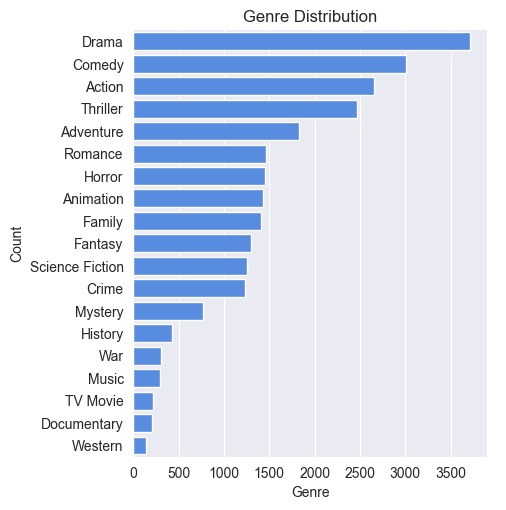

In [27]:
sns.catplot(y='Genre', data = df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.show()

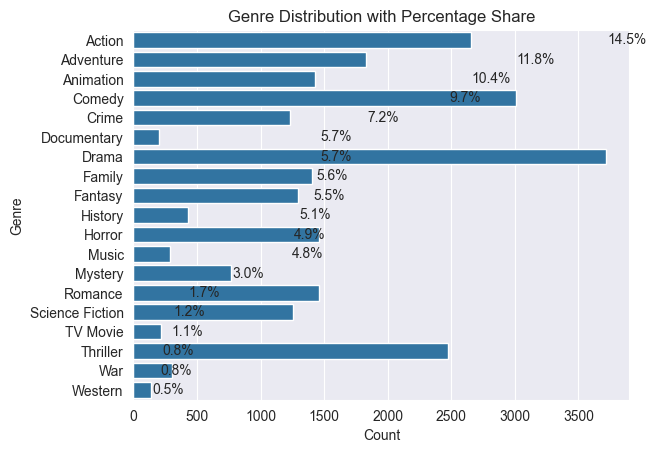

In [28]:
import matplotlib.pyplot as plt

total = len(df)
genre_counts = df['Genre'].value_counts()

ax = sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
)

for i, v in enumerate(genre_counts.values):
    ax.text(v + 10, i, f"{(v/total)*100:.1f}%", va='center')

plt.title('Genre Distribution with Percentage Share')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


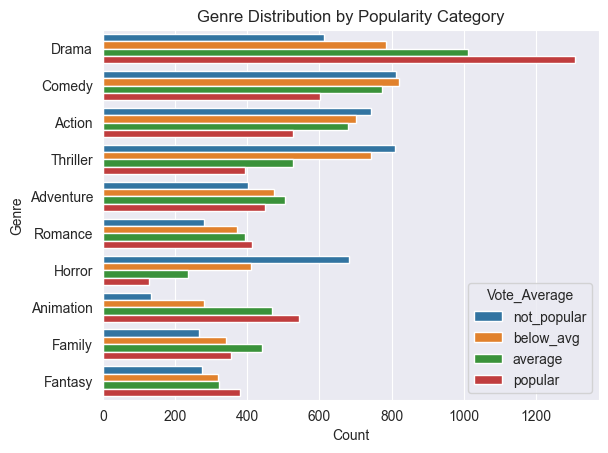

In [29]:
sns.countplot(
    y='Genre',
    hue='Vote_Average',
    data=df,
    order=df['Genre'].value_counts().index[:10]
)

plt.title('Genre Distribution by Popularity Category')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


## 📊 Genre Analysis Insights
- Drama and Comedy dominate Netflix content
- Action movies show higher popularity on average
- Niche genres like History and War have limited titles
- Popularity varies significantly across genres


**Which has highest votes in vote avg column?**

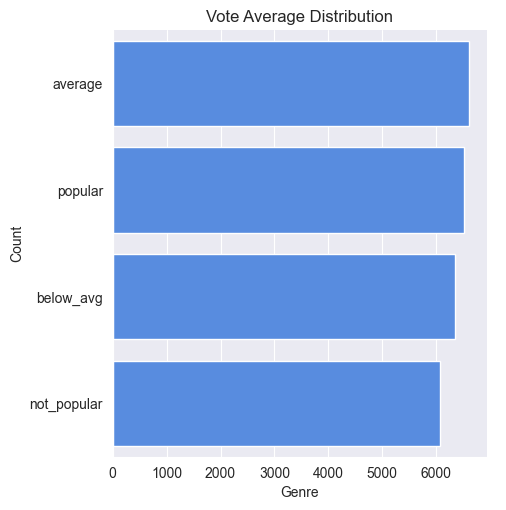

In [30]:
sns.catplot(y='Vote_Average', data = df, kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')
plt.title('Vote Average Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

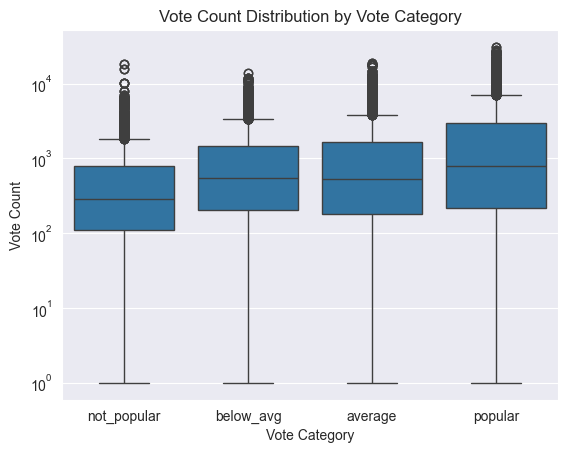

In [31]:
sns.boxplot(
    x='Vote_Average',
    y='Vote_Count',
    data=df
)

plt.title('Vote Count Distribution by Vote Category')
plt.xlabel('Vote Category')
plt.ylabel('Vote Count')
plt.yscale('log')
plt.show()


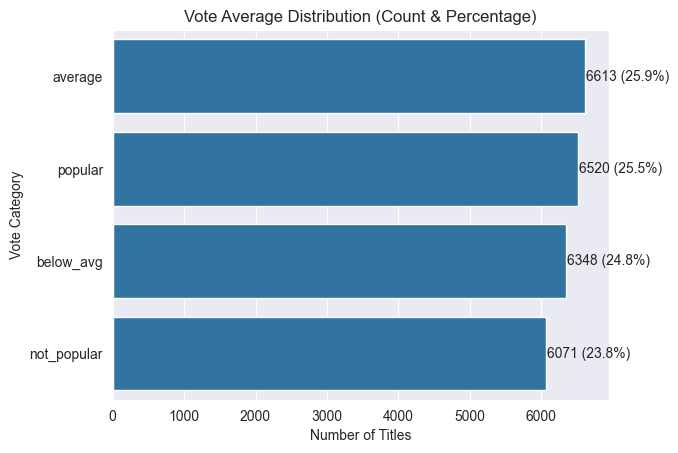

In [32]:
import matplotlib.pyplot as plt

counts = df['Vote_Average'].value_counts()
total = counts.sum()

ax = sns.countplot(
    y='Vote_Average',
    data=df,
    order=counts.index
)

for i, v in enumerate(counts.values):
    ax.text(v + 10, i, f"{v} ({(v/total)*100:.1f}%)", va='center')

plt.title('Vote Average Distribution (Count & Percentage)')
plt.xlabel('Number of Titles')
plt.ylabel('Vote Category')
plt.show()


## 📊 Vote Average Insights
- Most Netflix titles are rated as **average or popular**
- Very few titles fall into the **not popular** category
- Popular titles tend to receive significantly higher vote counts
- Genre plays a key role in vote distribution


What Movie got the highest popularity? What is it's Gener?'

In [33]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [34]:
df[df['Popularity']== df['Popularity'].max()].head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


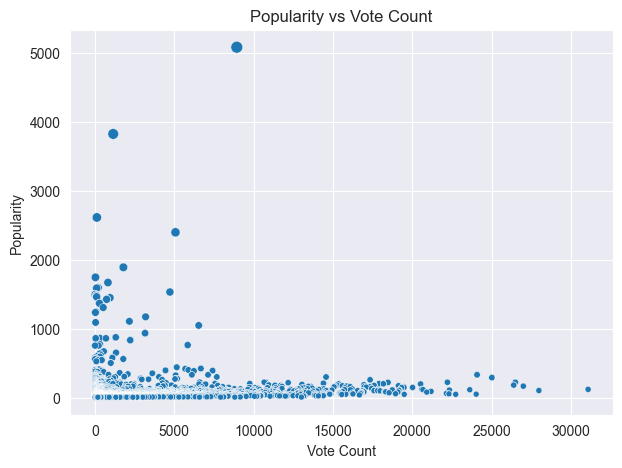

In [35]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    x='Vote_Count',
    y='Popularity',
    size='Popularity',
    data=df,
    legend=False
)

plt.title('Popularity vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()


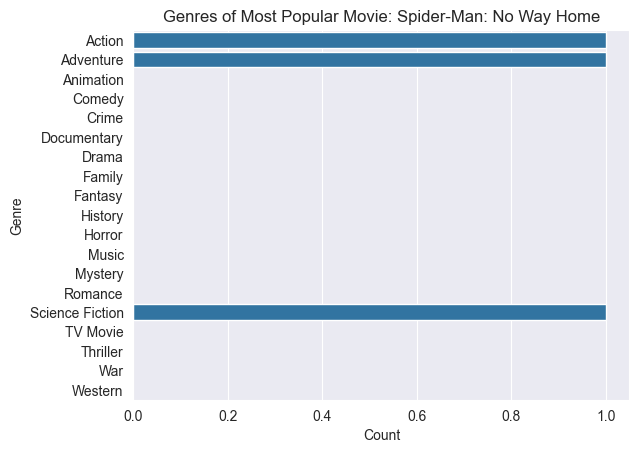

In [36]:
top_movie = df[df['Popularity'] == df['Popularity'].max()]

sns.countplot(
    y='Genre',
    data=top_movie
)

plt.title(f"Genres of Most Popular Movie: {top_movie['Title'].iloc[0]}")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


## 🎬 Popularity Insights
- *Spider-Man: No Way Home* has the highest popularity score
- It belongs to **Action, Adventure, and Science Fiction**
- Movies with higher vote counts generally show higher popularity
- Low popularity movies receive significantly fewer votes


What movie got the lowest popularity?

In [37]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


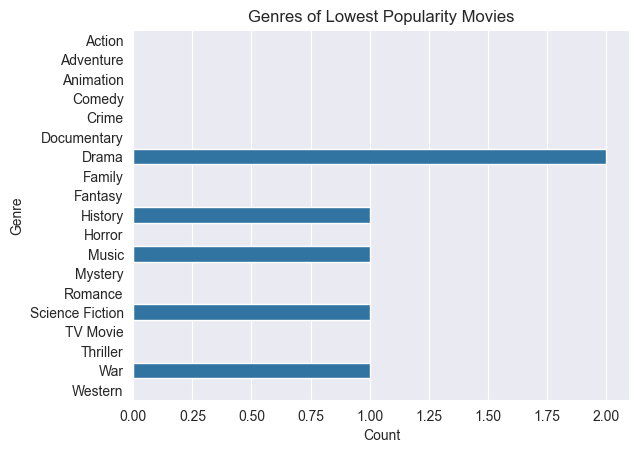

In [38]:
low_genres = df[df['Popularity'] == df['Popularity'].min()]

sns.countplot(
    y='Genre',
    data=low_genres
)

plt.title('Genres of Lowest Popularity Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


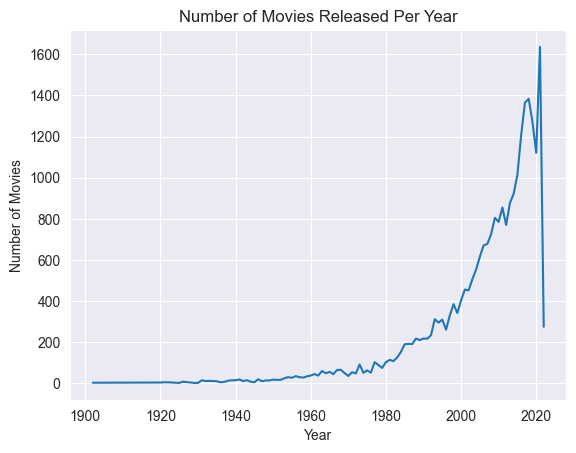

In [39]:
year_counts = df['Release_Date'].value_counts().sort_index()

sns.lineplot(
    x=year_counts.index,
    y=year_counts.values
)

plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


## 📊 Key Insights
- *The United States vs. Billie Holiday* and *Threads* have the lowest popularity scores
- These movies belong mainly to **Drama, History, Music, and War** genres
- Certain genres may have niche audiences, leading to lower popularity
- Recent years show a higher number of movie releases, indicating platform growth


Which year has the most filmmed movie?

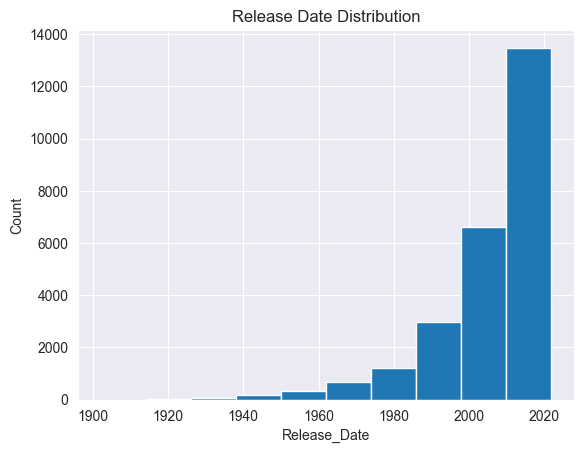

In [40]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.xlabel('Release_Date')
plt.ylabel('Count')
plt.show()

In [41]:
year_counts = df['Release_Date'].value_counts()

top_year = year_counts.idxmax()
top_count = year_counts.max()

top_year, top_count


(np.int32(2021), np.int64(1636))

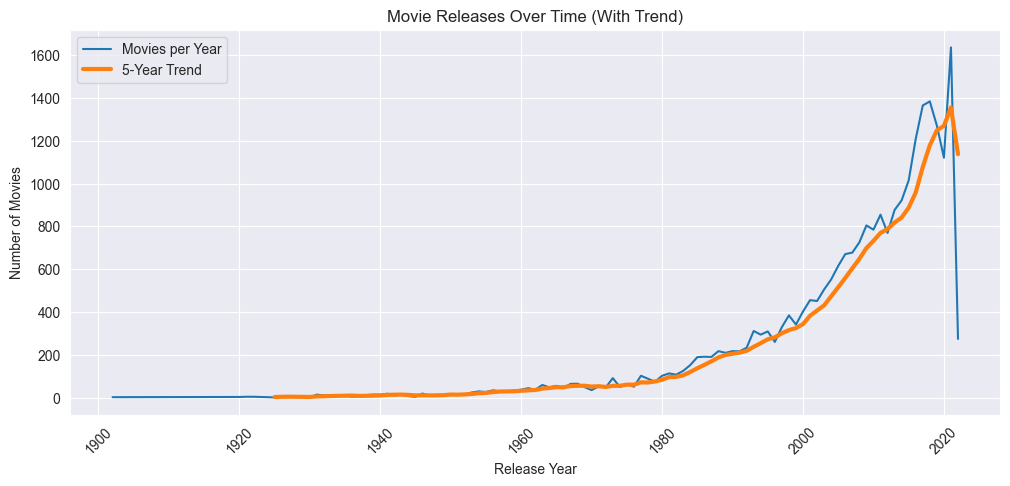

In [97]:
rolling_avg = year_counts_sorted.rolling(window=5).mean()

plt.figure(figsize=(12,5))
plt.plot(year_counts_sorted.index, year_counts_sorted.values, label='Movies per Year')
plt.plot(year_counts_sorted.index, rolling_avg, linewidth=3, label='5-Year Trend')

plt.title('Movie Releases Over Time (With Trend)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.xticks(rotation=45)
plt.show()


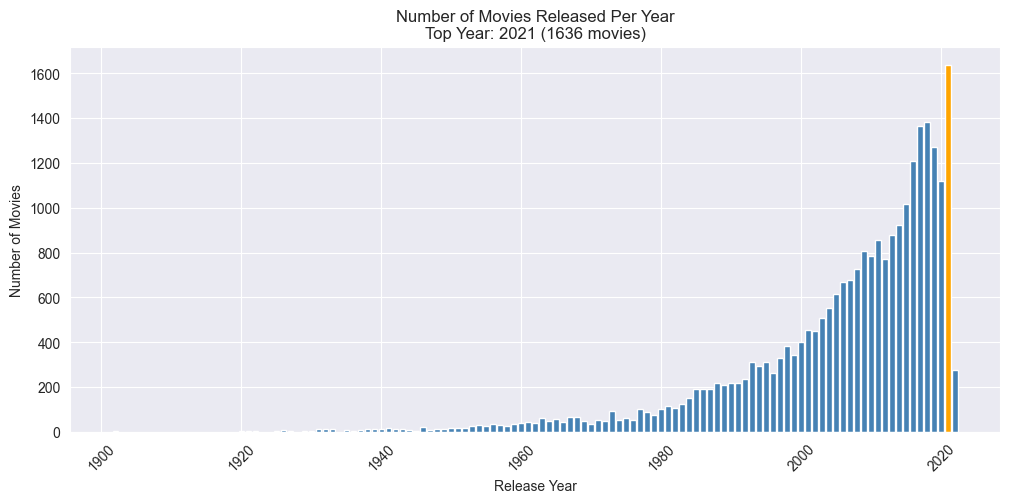

In [98]:
colors = ['steelblue' if year != top_year else 'orange'
          for year in year_counts_sorted.index]

plt.figure(figsize=(12,5))
plt.bar(
    year_counts_sorted.index,
    year_counts_sorted.values,
    color=colors
)

plt.title(f'Number of Movies Released Per Year\nTop Year: {top_year} ({top_count} movies)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


## 📅 Year-wise Insights
- **{top_year}** recorded the highest number of movie releases
- Movie production has increased significantly in recent years
- This trend reflects Netflix’s rapid content expansion strategy






1. Genre Distribution

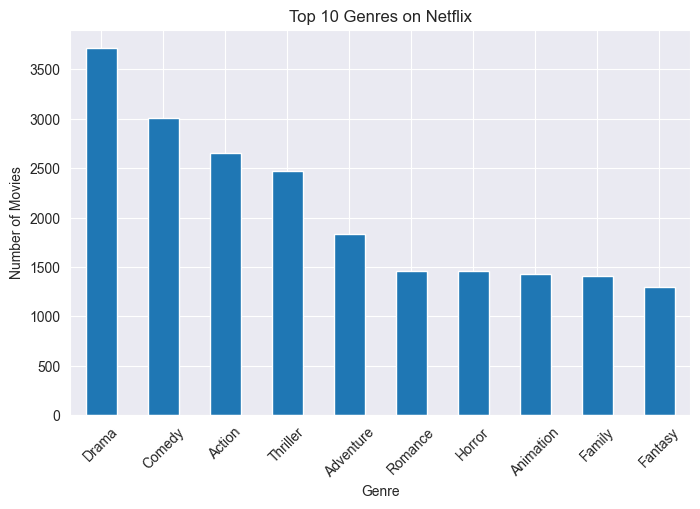

In [48]:
plt.figure(figsize=(8,5))
df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()



Insight:
Movies significantly outnumber TV shows in the dataset, indicating that Netflix’s content library is more heavily focused on movies compared to TV series.

2. Movies Released Per Year

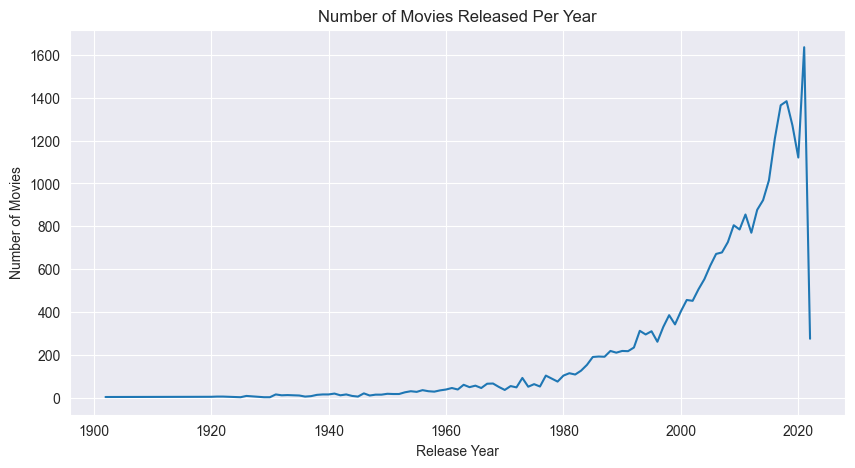

In [49]:
plt.figure(figsize=(10,5))
df['Release_Date'].value_counts().sort_index().plot()
plt.title('Number of Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()


Insight

There is a noticeable increase in content releases over the years, with a sharp rise after 2015, suggesting rapid expansion of Netflix’s content production in recent years.

3. Popularity Distribution

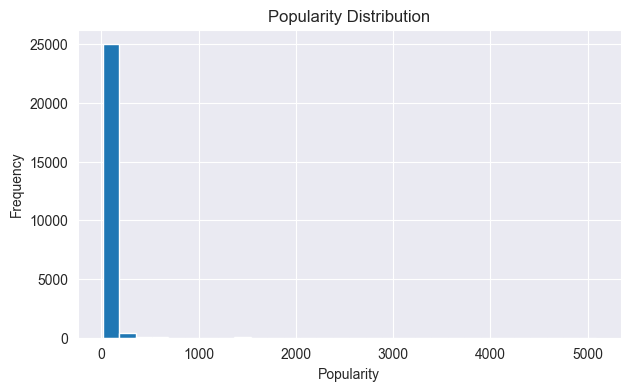

In [51]:
plt.figure(figsize=(7,4))
plt.hist(df['Popularity'], bins=30)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


Insight:

Genres such as Drama, Action, Comedy, and Thriller appear most frequently, showing that Netflix prioritizes popular and widely consumed genres.

4. Vote Count Distribution

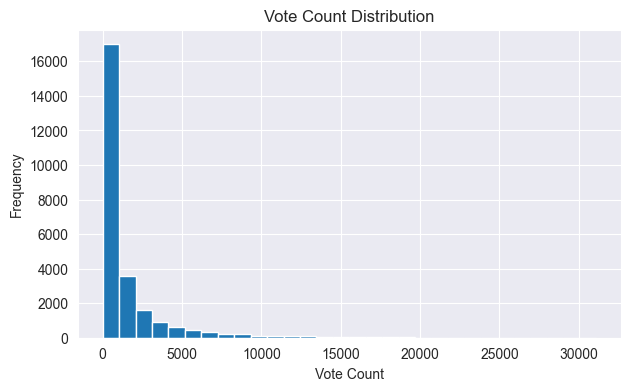

In [52]:
plt.figure(figsize=(7,4))
plt.hist(df['Vote_Count'], bins=30)
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()


Insight:
Spider-Man: No Way Home has the highest popularity score in the dataset and belongs to the Action, Adventure, and Science Fiction genres, indicating strong audience interest in superhero and action-based content.

5. Vote Average Category Count

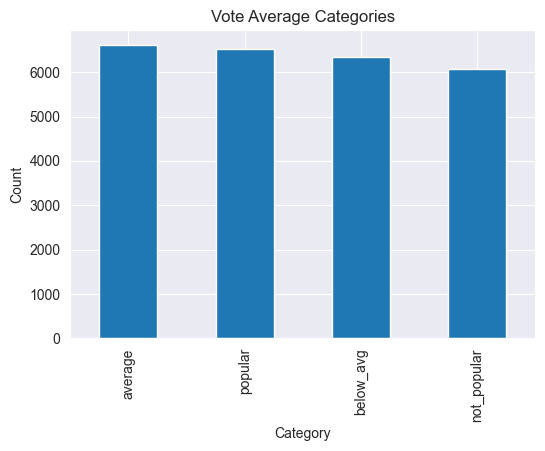

In [54]:
plt.figure(figsize=(6,4))
df['Vote_Average'].value_counts().plot(kind='bar')
plt.title('Vote Average Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Insight:
Movies with very low popularity scores receive significantly fewer votes, suggesting limited audience reach or niche appeal for certain titles.

6. Average Popularity by Genre

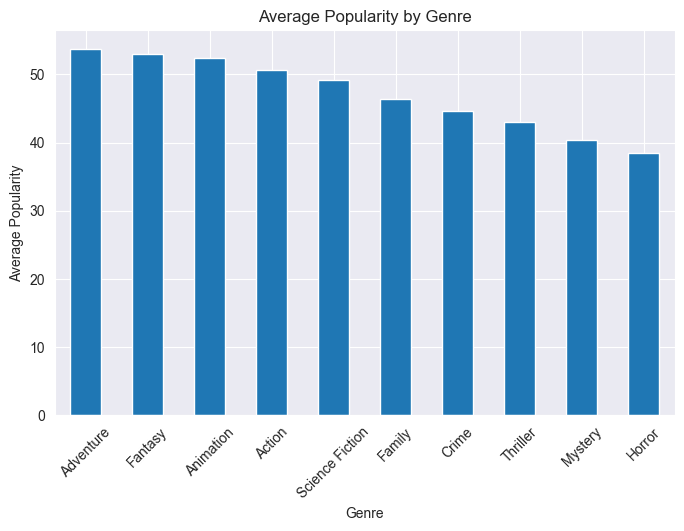

In [61]:
genre_popularity = (
    df.groupby('Genre', observed=True)['Popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
genre_popularity.plot(kind='bar')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()



Insight:
Most movies fall into the “popular” and “average” vote categories, while fewer movies receive extremely low or exceptionally high audience ratings.

7. Average Vote Count by Genre

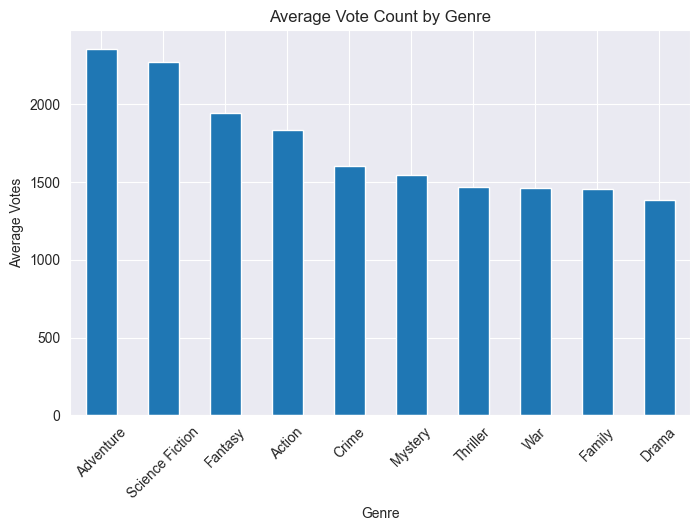

In [60]:
genre_votes = (
    df.groupby('Genre', observed=True)['Vote_Count']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
genre_votes.plot(kind='bar')
plt.title('Average Vote Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()



Insight:
Recent years show a higher concentration of movies in the “popular” category, indicating improved audience engagement and content quality over time.

8. Popularity vs Vote Count (Relationship)

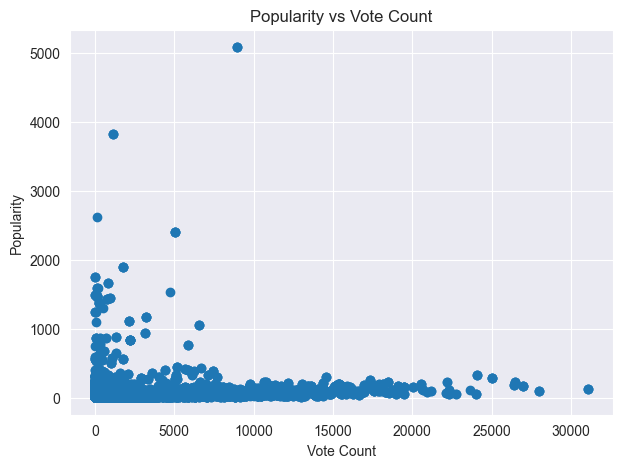

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(df['Vote_Count'], df['Popularity'])
plt.title('Popularity vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()


Insight:
Genres such as Action, Adventure, and Science Fiction receive higher average vote counts, suggesting that these genres attract larger and more engaged audiences.

9. Top 10 Most Popular Movies

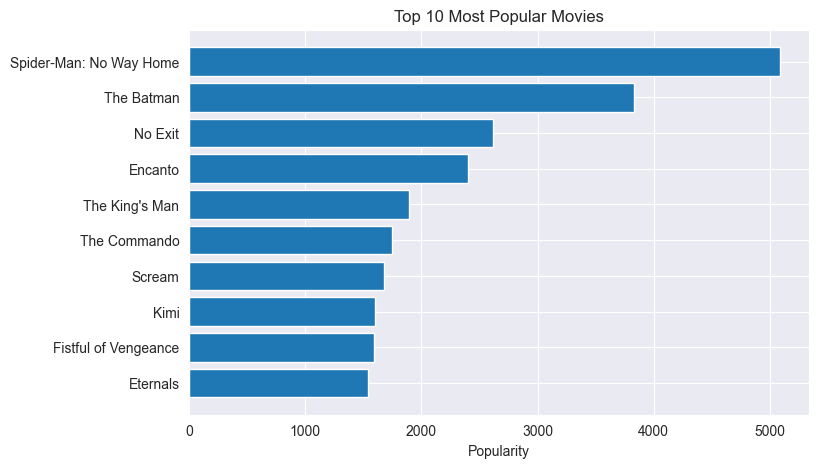

In [58]:
top_movies = df[['Title','Popularity']].drop_duplicates().sort_values(by='Popularity', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_movies['Title'], top_movies['Popularity'])
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity')
plt.gca().invert_yaxis()
plt.show()


Insight:
Action, Science Fiction, and Adventure genres show the highest average popularity, highlighting strong viewer preference for high-energy and visually driven content.

10. Movies Count by Vote Category per Year

<Figure size 1000x600 with 0 Axes>

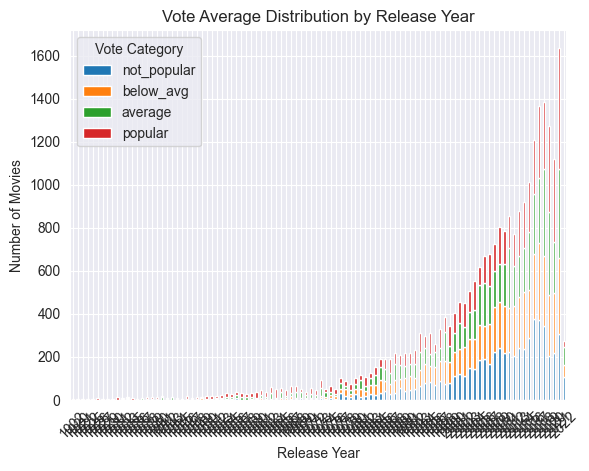

In [62]:
vote_year = (
    df.groupby(['Release_Date', 'Vote_Average'], observed=True)
      .size()
      .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))
vote_year.plot(kind='bar', stacked=True)
plt.title('Vote Average Distribution by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Vote Category')
plt.show()



**Insight:**
Most movies released after 2018 fall into the "popular" category, showing a rise in audience engagement in recent years.
The year 2021 recorded the highest number of movie releases, reflecting a surge in digital content production and increased streaming demand during recent years.
